# 0. Data Collection
---
Author: Natalie Castro
Date: 1/15/2025

The purpose of this notebook is to collect varying forms of data from different sources on the Internet to answer the research question:

    What are characteristics of self-identified political parities expressed in 2025 in climate change?


## 🌐1. Environment Creation

### 1.1 Library Import

In [1]:
''' DATA QUERYING '''
from bs4 import BeautifulSoup
import json
import requests
from time import sleep
import pypdf

''' DATA MANAGEMENT '''
import pandas as pd
import regex as re

C:\Users\natal\miniconda3\lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from this module in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


### 1.2 Secret Storage

In [2]:
''' NEWSAPI KEY'''
api_key = 'xxxxxxxxxxxxxxxxxxxx'

## **📡2. API Requests**

The keywords used in this analysis will be "democrat+climate" and "republican+climate"

### **2.1 NewsAPI**

For NewsAPI, three types of data will be collected. First, using the 'everything' endpoint which collects every article in the past five years from their corpora using a keyword. Next, will be the top headlines on January 20th, President Donald Trump's inaguration day. The final endpoint used will be the 'sources' to better undestand media production for each key word during this date.

#### 2.1.1 NewsAPI: Everything Endpoint

The code shown below is how the I got the API up and running, this was then iterated upon with the parameter 'page' to extract the entire set of results.

In [213]:
''' BUIDLING THE URL '''
base_url = "https://newsapi.org/v2/everything?"

url_post = {'apiKey':api_key,
            'source':'everything',
            'q':'democrat+climate', ## this iteration will be looking at democrat referencing articles
            'language':'en', ## selecting English as the data
            'sortBy':'popularity', ## used to generate a popularity label
}

url_post2 = {'apiKey':api_key,
            'source':'everything',
            'q':'republican+climate', ## this iteration will be looking at democrat referencing articles
            'language':'en', ## selecting English as the data
            'sortBy':'popularity', ## used to generate a popularity label
    
}

In [208]:
''' MAKING THE REQUEST '''

response = requests.get(base_url,url_post)

In [209]:
''' CHECKING OUT THE RESPONSE: DEMOCRAT '''
text = response.json()

In [8]:
dem_text['articles'][0]

{'source': {'id': None, 'name': 'CNET'},
 'author': 'Katie Collins',
 'title': 'For Progress on Climate and Energy in 2025, Think Local',
 'description': "As Trump and his anti-science agenda head for the White House, look to America's city and state leaders to drive climate action and prioritize clean energy.",
 'url': 'https://www.cnet.com/home/energy-and-utilities/for-progress-on-climate-and-energy-in-2025-think-local/',
 'urlToImage': 'https://www.cnet.com/a/img/resize/5fa89cffd3d573f39b4cf70398e5bb4b3038a2d7/hub/2024/12/31/540a7c2e-63f9-445f-a311-5744bcce16a2/us-map-localized-energy-progress.jpg?auto=webp&fit=crop&height=675&width=1200',
 'publishedAt': '2025-01-03T13:00:00Z',
 'content': 'With its sprawling canopy of magnolia, dogwood, southern pine and oak trees, Atlanta is known as the city in the forest. The lush vegetation helps offset the pollution from the commuter traffic as pe… [+16751 chars]'}

In [9]:
rep_text = republican_response.json()

In [10]:
rep_text.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [11]:
rep_text['totalResults']

1559

In [12]:
rep_text['articles'][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Nilay Patel',
 'title': 'Trump’s first 100 days: all the news impacting the tech industry',
 'description': 'President Donald Trump is taking on TikTok, electric vehicle policy, and AI in his first 100 days in office. This time around, he has the backing of many tech billionaires.',
 'url': 'https://www.theverge.com/24348851/donald-trump-presidency-tech-science-news',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/Nwo4_i4giY8lRM0Rtzih1IHTSLU=/0x0:2040x1360/1200x628/filters:focal(1020x680:1021x681)/cdn.vox-cdn.com/uploads/chorus_asset/file/25531809/STK175_DONALD_TRUMP_CVIRGINIA_C.jpg',
 'publishedAt': '2025-01-22T14:30:00Z',
 'content': 'Filed under:\r\nByLauren Feiner, a senior policy reporter at The Verge, covering the intersection of Silicon Valley and Capitol Hill. She spent 5 years covering tech policy at CNBC, writing about antit… [+7943 chars]'}


The structure of the response is a nested dictionary, with each list entry in the response a dictionary for the respective news article.

**🫏Iterating for Democrat Articles**

In [13]:
''' PAGE TURNER 

    INPUT: the desired page for the API call, the keyword used to build the URL
    OUTPUT: a list of the articles from the page
    
    The function page_turner is used to collect the entire corpus from the NEWSAPI
    for a particular keyword. This function is used wrapped into a for loop so 
    it can build a new url for each distinct page.

'''

base_url = "https://newsapi.org/v2/everything?"


def page_turner(page_number,keyword):
    sleep(2)
    ## Building the post URL for every page in the iteration
    url_post = {'apiKey':api_key,
            'source':'everything',
            'q':keyword, ## this iteration will be looking at democrat referencing articles
            'language':'en', ## selecting English as the data
            'sortBy':'popularity', ## used to generate a popularity label
            'page':page_number}
    
    
    response = requests.get(base_url,url_post)
    json_ = response.json()
    #print (json_.keys())
    return(json_['articles'])

In [20]:
nested_responses_democrat = []

for page in range(1,7):
    page_contents = page_turner(page,'democrat+climate')
    nested_responses_democrat.append(page_contents)

KeyError: 'articles'

In [31]:
nested_responses_republican = []

for page in range(1,17):
    page_contents = page_turner(page,'republican+climate')
    nested_responses_republican.append(page_contents)

KeyError: 'articles'

In [32]:
len(nested_responses_republican)

5

### 🦅 2.2 Congress.Gov API 

The purpose of collecting data from this API is to understand how different political sides have represented + instutionalized their view about climate change.

[GitHub Documentation](https://github.com/LibraryOfCongress/api.congress.gov/)  
[Using Congress Data Offsite](https://www.congress.gov/help/using-data-offsite)  
[Congress API Endpoints](https://gpo.congress.gov/#/)  
[Python Code Examples](https://github.com/LibraryOfCongress/api.congress.gov/tree/main/api_client/python)

In [2]:
api_key = 'XXX'

In [3]:
base_url = 'https://api.congress.gov/v3/bill?api_key=te7ilzFKEeAOrjfEalH5mrtFU0Dw35E6B70Nfhnn'

url_post = {
            'format':'json', # specifying the response format
            'offset':0, ## specifying the start of the records returned,
            'limit':10 ## specifying the number of records returned
            }

## For government APIs, it's generally good practice to provide some sort of user agent!
user_agent = {'user-agent': 'University of Colorado at Boulder, natalie.castro@colorado.edu'}

In [132]:
''' TEST 2'''
test2_response = requests.get(base_url,url_post,headers=user_agent)

In [133]:
test2_response

<Response [200]>

### 2.2.1 Collecting Bill Numbers

To do so, I will be changing the URL for a few different parameters and scraping the congress site. The filters generated are: legislation any status of legislation, and environmental protection policy area.

The URL for the bill search (as of 1/28/2025) is:https://www.congress.gov/search?q=%7B%22congress%22%3A%22all%22%2C%22source%22%3A%22all%22%2C%22bill-status%22%3A%22all%22%2C%22subject%22%3A%22Environmental+Protection%22%7D

A CSV was downloaded with the bill numbers with a total of 8,056 bills. The original downloaded CSV comes with three 'metadata' lines, these were consisted of the date collected, and the URL, which I have listed here. The three lines were deleted to read them in using Pandas.

In [7]:
bill_information1 = pd.read_csv(r"C:\Users\natal\OneDrive\university\info 5653\data\epa_bills_119_113.csv",encoding='utf-8')
bill_information2 = pd.read_csv(r"C:\Users\natal\OneDrive\university\info 5653\data\epa_bills_112_103.csv",encoding='utf-8')
bill_information3 = pd.read_csv(r"C:\Users\natal\OneDrive\university\info 5653\data\epa_bills_102_95.csv",encoding='utf-8')
bill_information4 = pd.read_csv(r"C:\Users\natal\OneDrive\university\info 5653\data\epa_bills_94_93.csv",encoding='utf-8')

bill_information = pd.concat([bill_information1,bill_information2,bill_information3,bill_information4])

In [8]:
bill_information.head()

,Legislation Number,URL,Congress,Title,Sponsor,Date of Introduction,Committees,Latest Action,Latest Action Date,Number of Cosponsors,Amends Bill,Date Offered,Date Submitted,Date Proposed,Amends Amendment
0,H.R. 375,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),Continued Rapid Ohia Death Response Act of 2025,"Tokuda, Jill N. [Rep.-D-HI-2] (Introduced 01/1...",1/13/2025,"House - Natural Resources, Agriculture | Senat...",Received in the Senate and Read twice and refe...,1/24/2025,1,NaN,NaN,NaN,NaN,NaN
1,H.R. 349,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),Goldie’s Act,"Malliotakis, Nicole [Rep.-R-NY-11] (Introduced...",1/13/2025,House - Agriculture,Referred to the House Committee on Agriculture.,1/13/2025,6,NaN,NaN,NaN,NaN,NaN
2,H.R. 313,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),Natural Gas Tax Repeal Act,"Pfluger, August [Rep.-R-TX-11] (Introduced 01/...",1/9/2025,House - Energy and Commerce,Referred to the House Committee on Energy and ...,1/9/2025,4,NaN,NaN,NaN,NaN,NaN
3,H.R. 288,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),Long Island Sound Restoration and Stewardship ...,"LaLota, Nick [Rep.-R-NY-1] (Introduced 01/09/2...",1/9/2025,"House - Transportation and Infrastructure, Nat...",Referred to the Subcommittee on Water Resource...,1/10/2025,4,NaN,NaN,NaN,NaN,NaN
4,H.R. 284,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),GLRI Act of 2025,"Joyce, David P. [Rep.-R-OH-14] (Introduced 01/...",1/9/2025,House - Transportation and Infrastructure,Referred to the Subcommittee on Water Resource...,1/10/2025,28,NaN,NaN,NaN,NaN,NaN


In [10]:
''' CREATING CONGRESS TITLES '''
def congress_finder(current_congress): 
    ## looking for, but not including the th or st
    regex_pattern = '[0-9]{2,3}(?!=[a-z]{2})'
    congress_match = re.findall(regex_pattern,current_congress)
    
    congress_num = int(congress_match[0])
    
    return(congress_num)

In [11]:
bill_information['Congress Number'] = bill_information['Congress'].apply(lambda x: congress_finder(x))

In [ ]:
''' CREATING A COLUMN FOR BILL TYPE:

The structure of all of the legislation numbers is [BILL TYPE]_[BILL NUMBER]. I will be using
Regex to extract and separate these columns
'''

In [12]:
''' BILL TYPE CLEANER: This function is used in a lambda apply down the rows to create the 
                        bill types needed for the congress.gov API

'''

bt_pattern = r'[A-Za-z]+\.*'
def bill_type_cleaner(bt):
    matches = re.findall(bt_pattern,bt)
    type_dirty = ''.join(matches)
    type_text = re.sub("\.","",type_dirty)
    type_clean = type_text.lower()
    return (type_clean)

In [13]:
bill_information['Bill Type'] = bill_information['Legislation Number'].apply(lambda x: bill_type_cleaner(x))

In [14]:
''' CREATING A COLUMN FOR BILL NUMBER '''
bt_num_pattern = r'[^A-Za-z\.]'
def bill_num_cleaner(bt):
    matches = re.findall(bt_num_pattern,bt)
    type_dirty = ''.join(matches)
    type_clean = type_dirty.lower().strip()
    return (int(type_clean)) ## The API asks for an integer

In [15]:
bill_information['Bill Number'] = bill_information['Legislation Number'].apply(lambda x: bill_num_cleaner(x))

In [ ]:
''' CREATING A COLUMN FOR SPONSOR AFFILIATION & CREATING A COLUMN FOR SPONSOR STATE ''' '''

In [16]:
affiliation_pattern = r'-[DRI]'
state_pattern = r'-[A-Z]{2}'
def affiliation_finder(sponsor):
    ## For party affiliation
    match = re.findall(affiliation_pattern,sponsor)
    clean_affiliation = re.sub("-","",match[0])
    
    return (clean_affiliation)

def state_finder(sponsor):
    
    ## For State affiliation
    state_match = re.findall(state_pattern,sponsor)
    clean_state = re.sub("-",'',state_match[0])
    return (clean_state)

In [17]:
bill_information['Sponser Affiliation'] = bill_information['Sponsor'].apply(lambda x: affiliation_finder(x))
bill_information['Sponser State'] = bill_information['Sponsor'].apply(lambda x: state_finder(x))

In [18]:
bill_information.head(2)

,Legislation Number,URL,Congress,Title,Sponsor,Date of Introduction,Committees,Latest Action,Latest Action Date,Number of Cosponsors,Amends Bill,Date Offered,Date Submitted,Date Proposed,Amends Amendment,Congress Number,Bill Type,Bill Number,Sponser Affiliation,Sponser State
0,H.R. 375,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),Continued Rapid Ohia Death Response Act of 2025,"Tokuda, Jill N. [Rep.-D-HI-2] (Introduced 01/1...",1/13/2025,"House - Natural Resources, Agriculture | Senat...",Received in the Senate and Read twice and refe...,1/24/2025,1,NaN,NaN,NaN,NaN,NaN,119,hr,375,D,HI
1,H.R. 349,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),Goldie’s Act,"Malliotakis, Nicole [Rep.-R-NY-11] (Introduced...",1/13/2025,House - Agriculture,Referred to the House Committee on Agriculture.,1/13/2025,6,NaN,NaN,NaN,NaN,NaN,119,hr,349,R,NY


In [23]:
bill_information.reset_index(inplace=True)
bill_information.drop(columns='index',inplace=True)

### 2.2. Collecting Bill Text URLS to Scrape from the Congress API

In [19]:
''' BUILDING A FUNCTION FOR THE URLS '''
def url_builder(congress,bill_type,bill_number):
    base_url = "https://api.congress.gov/v3/bill/"
    
    request_url = ""
    request_url = request_url + base_url + str(congress) + "/" + bill_type + "/" + str(bill_number) + '/text?api_key=te7ilzFKEeAOrjfEalH5mrtFU0Dw35E6B70Nfhnn'
    
    return (request_url)

In [20]:
user_agent = {'user-agent': 'University of Colorado at Boulder, natalie.castro@colorado.edu'}

''' BUILDING A FUNCTION FOR THE API REQUESTS TO GATHER THE DATA '''
def xml_link_collector(url):
    ## Making a response with our URL
    response = requests.get(url,headers=user_agent)
    
    ## Making sure the response was valid
    try:
        out = response.json()
        collected_url = out['textVersions'][0]['formats'][2]['url'] ## This was determined through parsing the output for a test example
        return (collected_url)
    except:
        print (f"⚠️ uh oh! there was an error when using the API with this url:{url}\n ")
        return ("NO URL FOUND")

In [21]:
url = url_builder(119,'hjres',30)

In [22]:
xml_link_collector(url)

'https://www.congress.gov/119/bills/hjres30/BILLS-119hjres30ih.xml'

### Collecting the Bill Information:

This will take place in two parts, because the rate limit for the congress API is 5000 requests per hour

In [ ]:
''' SCRAPING XMLS USING THE API -- [PART 1]'''

url_list = []

for row in range(0,len(bill_information[0:4998])):
    congress = bill_information.at[row,'Congress Number']
    bill_type = bill_information.at[row,'Bill Type']
    bill_number = bill_information.at[row,'Bill Number']
    
    current_url = url_builder(congress,bill_type,bill_number)
    
    ## Making sure the API connection is well rested (ie - avoiding the rate limit)
    if row % 100 == 0:
        sleep (5)
    
    xml_found = xml_link_collector(current_url)
    
    url_list.append(xml_found)


The otuput from the above cell was removed because there was a lot of errors, and when converting to HTML I did not want to bog down the page! Here is what some of the errors looked like
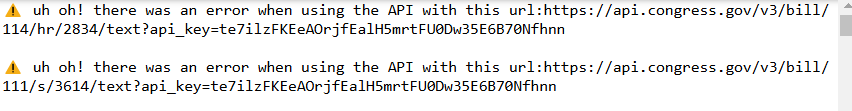

In [25]:
print (len(url_list))

4998


In [35]:
url_list[3249]

'https://www.congress.gov/109/bills/s2920/BILLS-109s2920is.xml'

In [45]:
url_list = url_list[:3250]

In [40]:
url_list[3249:3250]

['https://www.congress.gov/109/bills/s2920/BILLS-109s2920is.xml']

In [41]:
saving_urls = pd.DataFrame(url_list)
saving_urls.to_csv("Found URLs for Bills 0 - 3250.csv")

In [ ]:
''' SCRAPING XMLS USING THE API -- [PART 2] '''

for row in range(3250,len(bill_information[3250:])):
    congress = bill_information.at[row,'Congress Number']
    bill_type = bill_information.at[row,'Bill Type']
    bill_number = bill_information.at[row,'Bill Number']
    
    current_url = url_builder(congress,bill_type,bill_number)
    
    ## Making sure the API connection is well rested (ie - avoiding the rate limit)
    if row % 100 == 0:
        sleep (5)
    
    xml_found = xml_link_collector(current_url)
    
    url_list.append(xml_found)

In [47]:
## Testing that all went well...

print (f"The expected length of the URL list should be {len(bill_information)}.\nThe actual length of the URL list is {len(url_list)}.")

The expected length of the URL list should be 8056.
The actual length of the URL list is 4806.


#### Uh-Oh! I think a lot of the older bills do not have the ability to be called for API access

To fix this, I am going to deconstruct the URLs and then only get the information on those Bills.

At this stage, I am filtering to look for what Bills do have available URLs

In [153]:
urls_raw = pd.DataFrame(url_list)
urls_raw.rename(columns={0:"URL"},inplace=True)

In [139]:
congress_pattern = '(?<=/)[0-9]{2,3}'
bt_pattern = '(?<=s/)[h,c,r,o,n,e,s,j,r]{1,7}'
bill_num_pattern = '(?<=[a-z])\d{1,4}(?!=\/BILL)'

In [140]:
url_congress = []
url_bt = []
url_num = []

for row in range(0,len(urls_raw)):
    curr_url = urls_raw.at[row,'URL']
    
    congress = re.findall(congress_pattern,curr_url)
    bill_type = re.findall(bt_pattern,curr_url)
    bill_num = re.findall(bill_num_pattern,curr_url)
    
    if len(congress) > 0:
        if len(bill_type) > 0:
            if len(bill_num) > 0:
                url_congress.append(int(congress[0]))
                url_bt.append(bill_type[0])
                url_num.append(int(bill_num[0]))
                
            else:
                url_num.append('DROP')
        else:
            url_bt.append('DROP')
    else:
        url_congress.append('DROP')
        url_bt.append('DROP')
        url_num.append('DROP')
    
    

In [141]:
urls_raw['Congress Number'] = url_congress
urls_raw['Bill Type'] = url_bt
urls_raw['Bill Number'] = url_num

In [142]:
## Cleaning the URLs
urls_raw.drop_duplicates(inplace=True)

In [143]:
## And dropping if there was any error in the regex find all
congress_condition = urls_raw['Congress Number'] != 'DROP'
bt_condition = urls_raw['Bill Type'] != 'DROP'
bn_condition = urls_raw['Bill Number'] != 'DROP'

urls_raw1 = urls_raw[congress_condition]
urls_raw2 = urls_raw1[bt_condition]
urls_clean = urls_raw2[bn_condition]

C:\Users\natal\AppData\Local\Temp\ipykernel_13272\878941524.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  urls_raw2 = urls_raw1[bt_condition]
C:\Users\natal\AppData\Local\Temp\ipykernel_13272\878941524.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  urls_clean = urls_raw2[bn_condition]


In [158]:
## Now mergine back from the Bill Information

bill_information_final = pd.merge(left=urls_clean,right=bill_information, on=['Congress Number','Bill Type','Bill Number'],validate='1:1')

In [159]:
len(bill_information_final)

3262

In [161]:
## Now Saving the Supplemented DataFrame 
bill_information_final.to_csv("Bill Information Supplemented.csv")

In [199]:
url_list = bill_information_final['API URL'].to_list()

In [164]:
bill_information_final.head(2)

,API URL,Congress Number,Bill Type,Bill Number,Legislation Number,URL,Congress,Title,Sponsor,Date of Introduction,...,Latest Action,Latest Action Date,Number of Cosponsors,Amends Bill,Date Offered,Date Submitted,Date Proposed,Amends Amendment,Sponser Affiliation,Sponser State
0,https://www.congress.gov/119/bills/hr375/BILLS...,119,hr,375,H.R. 375,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),Continued Rapid Ohia Death Response Act of 2025,"Tokuda, Jill N. [Rep.-D-HI-2] (Introduced 01/1...",1/13/2025,...,Received in the Senate and Read twice and refe...,1/24/2025,1,NaN,NaN,NaN,NaN,NaN,D,HI
1,https://www.congress.gov/119/bills/hr349/BILLS...,119,hr,349,H.R. 349,https://www.congress.gov/bill/119th-congress/h...,119th Congress (2025-2026),Goldie’s Act,"Malliotakis, Nicole [Rep.-R-NY-11] (Introduced...",1/13/2025,...,Referred to the House Committee on Agriculture.,1/13/2025,6,NaN,NaN,NaN,NaN,NaN,R,NY


### 2.2.2 🕸️Scraping XML URLs

To get the text for each bill, the XML URL will be scraped and appended to the dataframe we are working with.

In [150]:
''' XML-PARSER:

In the XML output, I am interested in the Bill Title and Text, although the title is already in the Bill Information,
I just want to make sure everything is correct! This parser will take an input of an XML url, make the request, parse 
in the soup, and return the output as a title and text!

No preprocessing will occur at this stage, and the raw text will just be appended as a column to the Bill Information. 
Later on, this will make it easier to generate the labels

'''

def xml_searcher(xml_url):
    xml_output = requests.get(xml_url)
    raw_xml = xml_output.text
    
    ## Using Beautiful Soup as a parser
    xml_soup = BeautifulSoup(raw_xml,'xml')
    
    ## Parsing for the title
    current_title = xml_soup.title
    
    ## Parsing for the text
    current_text = xml_soup.text
    
    return (current_title,current_text)

In [165]:
test_title ,test_text = xml_searcher(url_list[400])

In [166]:
test_title

<dc:title>118 S2959 RS: Brownfields Reauthorization Act of 2023</dc:title>

In [167]:
test_text

'\n\n118 S2959 RS: Brownfields Reauthorization Act of 2023\nU.S. Senate\n2023-09-27\ntext/xml\nEN\nPursuant to Title 17 Section 105 of the United States Code, this file is not subject to copyright protection and is in the public domain.\n\n\n\nIICalendar No. 214118th CONGRESS1st SessionS. 2959IN THE SENATE OF THE UNITED STATESSeptember 27 (legislative day, September 22), 2023Mr. Carper, from the Committee on Environment and Public Works, reported the following original bill; which was read twice and placed on the calendarA BILLTo amend the Comprehensive Environmental Response, Compensation, and Liability Act of 1980 to reauthorize brownfields revitalization funding, and for other purposes.1.Short titleThis Act may be cited as the Brownfields Reauthorization Act of 2023.2.Improving small and disadvantaged community access to grant opportunitiesSection 104(k) of the Comprehensive Environmental Response, Compensation, and Liability Act of 1980 (42 U.S.C. 9604(k)) is amended—(1)in paragrap

In [203]:
''' APPLYING THE XML PARSER '''
title_list = []
text_list = []

for url in url_list:
    try:
        title ,text = xml_searcher( url)

        title_list.append(title)
        text_list.append(text)
    except:
        title_list.append("ERROR")
        text_list.append("ERROR")

In [204]:
## Checking that everything went smoothly
print (len(title_list))
print (len(text_list))

3262
3262


In [205]:
bill_information_final['Bill Title (XML)'] = title_list
bill_information_final['Bill Text'] = text_list

In [214]:
## Saving just in case :)
bill_information.to_csv("Bill Information Supplemented.csv")

## 👷🏻‍♀️ 3. Data Structuring

At this stage, the data will not be cleaned and will be done so in a subsequent notebook. The data is structured using the provided query from the API or webscrape and is not altered.

### 3.1 News API

#### 3.1.1 NewsAPI: Everything

In [24]:
''' DATAFRAME GENERATION - DEMOCRAT '''
concatenate_democrats = []
for dataset in nested_responses_democrat:
    current_dataframe = pd.DataFrame(dataset)
    concatenate_democrats.append(current_dataframe)

In [25]:
democrat_articles = pd.concat(concatenate_democrats)

In [27]:
print (len(democrat_articles))

444


In [26]:
democrat_articles.head(2)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'CNET'}",Katie Collins,"For Progress on Climate and Energy in 2025, Th...",As Trump and his anti-science agenda head for ...,https://www.cnet.com/home/energy-and-utilities...,https://www.cnet.com/a/img/resize/5fa89cffd3d5...,2025-01-03T13:00:00Z,"With its sprawling canopy of magnolia, dogwood..."
1,"{'id': 'time', 'name': 'Time'}",Will Weissert and Chris Megerian / AP,Trump to Visit Disaster-Stricken California an...,President Trump is heading to hurricane-batter...,https://time.com/7209700/trump-los-angeles-wil...,https://api.time.com/wp-content/uploads/2025/0...,2025-01-24T06:30:00Z,WASHINGTON President Donald Trump is heading t...


In [33]:
democrat_articles.describe()

,source,author,title,description,url,urlToImage,publishedAt,content
count,444,402,444,443,444,319,444,444
unique,119,285,421,429,444,315,424,441
top,"{'id': None, 'name': 'Freerepublic.com'}",Breitbart,Democrat Sen. Markey: L.A. Fires Are ‘Climate ...,Democrat Massachusetts Sen. Ed Markey has clai...,https://www.cnet.com/home/energy-and-utilities...,https://static.dw.com/image/71400751_6.jpg,2025-01-25T05:00:00Z,"In a confirmation hearing on Thursday, Democra..."
freq,119,14,4,4,1,3,3,2


In [34]:
''' DATAFRAME GENERATION - REPUBLICAN '''
concatenate_republicans = []
for dataset in nested_responses_republican:
    current_dataframe = pd.DataFrame(dataset)
    concatenate_republicans.append(current_dataframe)

In [37]:
republican_articles = pd.concat(concatenate_republicans)

In [38]:
republican_articles.head(2)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Nilay Patel,Trump’s first 100 days: all the news impacting...,"President Donald Trump is taking on TikTok, el...",https://www.theverge.com/24348851/donald-trump...,https://cdn.vox-cdn.com/thumbor/Nwo4_i4giY8lRM...,2025-01-22T14:30:00Z,"Filed under:\r\nByLauren Feiner, a senior poli..."
1,"{'id': None, 'name': 'Gizmodo.com'}","Kate Yoder, Grist",The Quiet Death of Biden’s Climate Corps—and W...,Biden's green jobs program was never what it s...,https://gizmodo.com/the-quiet-death-of-bidens-...,https://gizmodo.com/app/uploads/2025/01/Americ...,2025-01-18T15:00:26Z,Giorgio Zampaglione loved his two-hour commute...


In [40]:
republican_articles.describe()

,source,author,title,description,url,urlToImage,publishedAt,content
count,376,350,376,376,376,373,376,376
unique,93,267,375,365,376,369,371,370
top,"{'id': None, 'name': 'Forbes'}",ABC News,"US to withdraw from Paris agreement, expand dr...","Organizations including Walmart, Lowe’s and Me...",https://www.theverge.com/24348851/donald-trump...,https://imageio.forbes.com/specials-images/ima...,2025-01-16T10:00:00Z,<ul><li>Trump endorses House Speaker Mike John...
freq,29,18,2,3,1,3,2,4


In [41]:
''' DATA STORAGE

This is saving all of the raw data (minimal structuring) to their respective CSV files.

'''

## Everything endpoint
republican_articles.to_csv("NEWSAPI - republican climate articles raw.csv")
democrat_articles.to_csv("NEWSAPI - democrat climate articles raw.csv")

#### 3.1.2 NewsAPI sources

The sources for each type will be removed from each headline with their authors. This is to better understand who is representing and providing narrative to each party.

In [43]:
democrat_sources = democrat_articles[['source','author']]
republican_sources = republican_articles[['source','author']]

In [44]:
len(democrat_sources)

444

In [45]:
democrat_sources.head(2)

,source,author
0,"{'id': None, 'name': 'CNET'}",Katie Collins
1,"{'id': 'time', 'name': 'Time'}",Will Weissert and Chris Megerian / AP


In [46]:
republican_sources.head(2)

,source,author
0,"{'id': 'the-verge', 'name': 'The Verge'}",Nilay Patel
1,"{'id': None, 'name': 'Gizmodo.com'}","Kate Yoder, Grist"


In [47]:
''' SOURCE CLEANER:

    INPUT: a list of sources in a dictionary structure with the key 'name'
    OUTPUT: two lists: the first contains the entire list of sources 
            cleaned, and the second is only the unique sources
            
    The purpose of this function is to clean the results from the everything
    endpoint from the NewsAPI. The result will be a list (can be appened)
    to a new dataframe to match the authors of clean sources. The second
    return of the function is a unique list of sources

'''


def source_cleaner(source_list):
    ## Creating a storage container for the cleaned sources
    cleaned_sources = []
    
    ## Iterating through each source in the provided list
    for source in source_list:
        ## Obtaining the name + storing it
        current_source = source['name']
        
        cleaned_sources.append(current_source)
    
    ## Finding the Unique Sources from the list
    unique_sources = list(set(cleaned_sources))
    
    return (cleaned_sources,unique_sources)

In [48]:
dem_sources_full = democrat_sources['source'].to_list().copy()
rep_sources_full = republican_sources['source'].to_list().copy()

In [49]:
dem_cleaned_sources,dem_unique_sources = source_cleaner(dem_sources_full)
rep_cleaned_sources,rep_unique_sources = source_cleaner(rep_sources_full)

In [50]:
democrat_sources['source'] = dem_cleaned_sources
republican_sources['source'] = rep_cleaned_sources

C:\Users\natal\AppData\Local\Temp\ipykernel_22124\2483140677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrat_sources['source'] = dem_cleaned_sources
C:\Users\natal\AppData\Local\Temp\ipykernel_22124\2483140677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republican_sources['source'] = rep_cleaned_sources


In [54]:
dem_list = []
for i in range(0,len(democrat_sources)):
    dem_list.append("Democrat")
    
democrat_sources['Party'] = dem_list

rep_list = []
for i in range(0,len(republican_sources)):
    rep_list.append("Republican")
    
republican_sources['Party'] = rep_list

C:\Users\natal\AppData\Local\Temp\ipykernel_22124\654442435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrat_sources['Party'] = dem_list
C:\Users\natal\AppData\Local\Temp\ipykernel_22124\654442435.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republican_sources['Party'] = rep_list


In [60]:
democrat_sources.fillna('No Author',inplace=True)
republican_sources.fillna('No Author',inplace=True)

C:\Users\natal\AppData\Local\Temp\ipykernel_22124\1565605381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  democrat_sources.fillna('No Author',inplace=True)
C:\Users\natal\AppData\Local\Temp\ipykernel_22124\1565605381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  republican_sources.fillna('No Author',inplace=True)


In [61]:
democrat_sources

,source,author,Party
0,CNET,Katie Collins,Democrat
1,Time,Will Weissert and Chris Megerian / AP,Democrat
2,Politicopro.com,"Blanca Begert, Camille von Kaenel, Thomas Fran...",Democrat
3,Scientific American,Tanya Lewis,Democrat
4,Vox,Benji Jones,Democrat
...,...,...,...
95,PBS,"Will Weissert, Associated Press, Amelia Thomso...",Democrat
96,PBS,"Michelle L. Price, Associated Press",Democrat
97,PBS,"Bernard McGhee, Associated Press",Democrat
98,The Times of India,Navtej Sarna,Democrat


In [62]:
republican_sources

,source,author,Party
0,The Verge,Nilay Patel,Republican
1,Gizmodo.com,"Kate Yoder, Grist",Republican
2,BBC News,No Author,Republican
3,BBC News,No Author,Republican
4,BBC News,No Author,Republican
...,...,...,...
75,MSNBC,"Jasen Castillo, John Schuessler, Miranda Priebe",Republican
76,MSNBC,Jen Psaki,Republican
77,Themorningnews.org,The Morning News,Republican
78,Finextra,Editorial Team,Republican


In [63]:
all_sources = pd.concat([democrat_sources,republican_sources])

## 4. Supplementary Media

The supplementary media collected in this section is two PDF files from each of the respective parties. The party platform is the document produced by each party, to proclaim their goals and resolutions if they take office.

In [105]:
dem_pdf= pypdf.PdfReader(r"C:\Users\natal\OneDrive\university\info 5653\data\2024_democratic_party_platform.pdf",strict=True)

In [88]:
rep_pdf = pypdf.PdfReader(r"C:\Users\natal\OneDrive\university\info 5653\data\2024_republican_party_platform.pdf")

In [106]:
''' EXPLORING THE METADATA'''
dem_pdf.metadata

{'/Title': 'FINAL MASTER PLATFORM',
 '/Producer': 'Skia/PDF m129 Google Docs Renderer'}

In [108]:
dem_pdf.

<bound method PdfReader.decode_permissions of <pypdf._reader.PdfReader object at 0x00000206AB5438B0>>

In [93]:
len(dem_pdf.pages)

92

In [90]:
rep_pdf.metadata

{'/CreationDate': "D:20240710083033-05'00'",
 '/Creator': 'Adobe InDesign 19.4 (Macintosh)',
 '/ModDate': "D:20240710083036-05'00'",
 '/Producer': 'Adobe PDF Library 17.0',
 '/Trapped': '/False'}

In [95]:
len(rep_pdf.pages)

28

#### 4.3.1 Extracting Text

In [91]:
''' A SIMPLE EXTRACTION TEXT'''
page1 = rep_pdf.pages[0]

In [96]:
print(page1.extract_text())

4343RDRD REPUBLICAN NATIONAL CONVENTION REPUBLICAN NATIONAL CONVENTION
PLATFORMTHE 2024 REPUBLICAN
MAKE AMERICA GREAT AGAIN!


In [97]:
''' EXTRACTING TEXT FROM DEMOCRAT DOCUMENT'''
democrat_party_platform = []

for page in range(0,len(dem_pdf.pages)):
    current_page = dem_pdf.pages[page]
    current_text = current_page.extract_text()
    democrat_party_platform.append(current_text)

In [98]:
''' EXTRACTING TEXT FROM REPUBLICAN DOCUMENT'''
republican_party_platform = []

for page in range(0,len(rep_pdf.pages)):
    current_page = rep_pdf.pages[page]
    current_text = current_page.extract_text()
    republican_party_platform.append(current_text)

In [111]:
''' COMBINING INTO ONE TEXT PER PARTY '''
democrat_party_platform_all = ' '.join(democrat_party_platform)
republican_party_platform_all = ' '.join(republican_party_platform)

In [109]:
''' SAVING THE RAW TEXTS AS .TXTS'''
with open("democrat_party_platform.txt", "w",errors='replace') as file:
    file.write(democrat_party_platform_all)

In [112]:
with open("republican_party_platform.txt", "w",errors='replace') as file:
    file.write(republican_party_platform_all)